# Student Performance Indicator 

## Project WorkFlow

- Understanding the Problem Statement
- Data collection
- Data checks to perform 
- Exploratory Data Analysis
- Data Pre-Processing 
- Model Training
- Choosing the best and appropriate model

## 1) Problem Statement

- This project aims to understand how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course. 

## 2) Data Collection

- **Data Source**: https://www.kaggle.com/datasets/sonukumari47/students-performance-in-exams
- The Dataset contains 8 columns and 1000 rows

### 2.1) Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the dataset as Pandas Dataframe

In [2]:
df = pd.read_csv('project_data/stud.csv')

### 2.2) Data Understanding

In [3]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2.3) Data Checks

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 2.4) Dataset Information

- **gender**: sex of students → (Male/Female)  
- **race/ethnicity**: ethnicity of students → (Group A, B, C, D, E)  
- **parental level of education**: parents' final education → (bachelor's degree, some college, master's degree, associate's degree, high school)  
- **lunch**: having lunch before test → (standard or free/reduced)  
- **test preparation course**: complete or not complete before test  
- **Type of Exam Scores**: Math, Reading, Writing
- There are no missing values and duplicates
- From the description of the numeric data, the means and standard deviation of 3 exam scores are very close together (between 66 and 68.05 for means) and (14.6 and 15.19 for standard deviation)
- Mininum scores for math, writing, and reading is 0, 10 and 17 respectively


## 3) Exploratory Data Analysis

### 3.1) Categorical Variable Exploration


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
 print("Categories in 'gender' variable: ")
print(df['gender'].unique(), "\n")
print("Categories in 'race_ethnicity' variable: ")
print(df['race_ethnicity'].unique(), "\n")
print("Categories in 'parental_level_of_education' variable: ")
print(df['parental_level_of_education'].unique(), "\n")
print("Categories in 'lunch' variable: ")
print(df['lunch'].unique(), "\n")
print("Categories in 'test_preparation_course' variable: ")
print(df['test_preparation_course'].unique(), "\n")



Categories in 'gender' variable: 
['female' 'male'] 

Categories in 'race_ethnicity' variable: 
['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in 'parental_level_of_education' variable: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch' variable: 
['standard' 'free/reduced'] 

Categories in 'test_preparation_course' variable: 
['none' 'completed'] 



In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score'] = df['Total_Score'] / 3
df['Average_Score'] = df['Average_Score'].round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [15]:
reading_full = df[df['reading_score'] == 100]['Average_Score'].count()
print(f"Number of students who scored 100 in reading: {reading_full}")  
math_full = df[df['math_score'] == 100]['Average_Score'].count()
print(f"Number of students who scored 100 in math: {math_full}")    
writing_full = df[df['writing_score'] == 100]['Average_Score'].count()
print(f"Number of students who scored 100 in writing: {writing_full}")

Number of students who scored 100 in reading: 17
Number of students who scored 100 in math: 7
Number of students who scored 100 in writing: 14


In [16]:
reading_less_20 = df[df['reading_score'] < 20]['Average_Score'].count()
print(f"Number of students who scored less than 20 in reading: {reading_less_20}")
math_less_20 = df[df['math_score'] < 20]['Average_Score'].count()
print(f"Number of students who scored less than 20 in math: {math_less_20}")
writing_less_20 = df[df['writing_score'] < 20]['Average_Score'].count()
print(f"Number of students who scored less than 20 in writing: {writing_less_20}")

Number of students who scored less than 20 in reading: 1
Number of students who scored less than 20 in math: 4
Number of students who scored less than 20 in writing: 3


### 3.2) Data Visualization

#### By Exam Scores

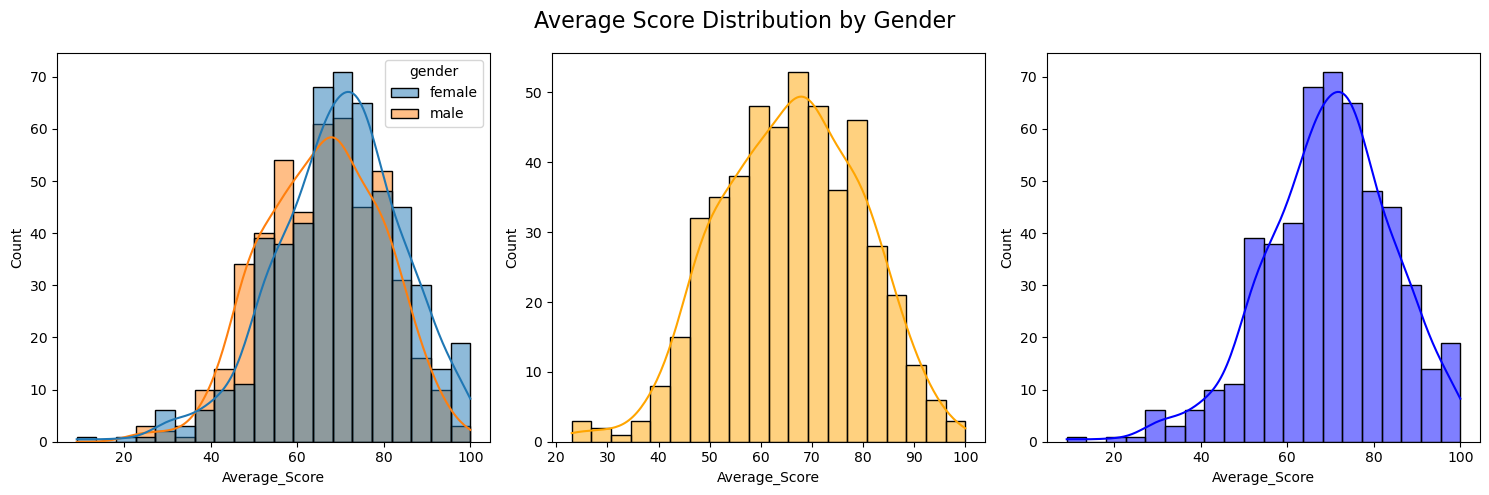

In [17]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.histplot(data= df, x='Average_Score', kde=True, hue='gender', bins=20)
plt.subplot(1, 3, 2)
sns.histplot(data= df[df['gender']=='male'], x='Average_Score', kde=True, color='orange', bins=20)
plt.subplot(1, 3, 3)
sns.histplot(data= df[df['gender'] =='female'], x='Average_Score', kde=True, color='blue',bins=20)
plt.suptitle('Average Score Distribution by Gender', fontsize=16)

plt.tight_layout()
plt.show()


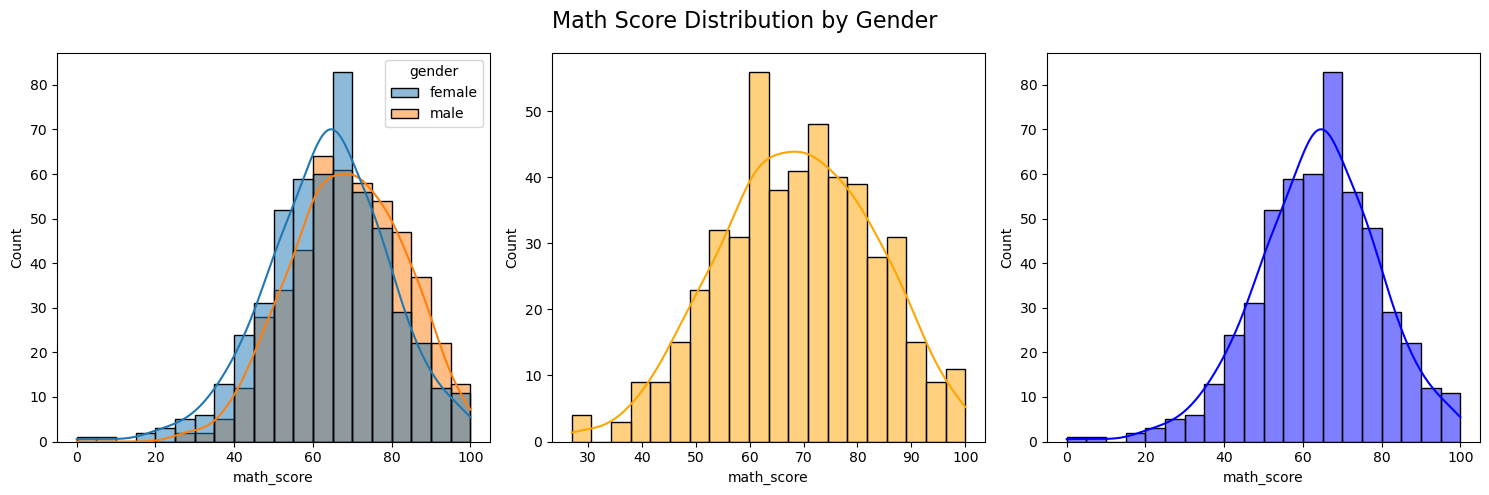

In [18]:
# Math Score
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='math_score', kde=True, hue='gender', bins=20)
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='math_score', kde=True, color='orange', bins=20)
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='math_score', kde=True, color='blue', bins=20)
plt.suptitle('Math Score Distribution by Gender', fontsize=16)

plt.tight_layout()
plt.show()

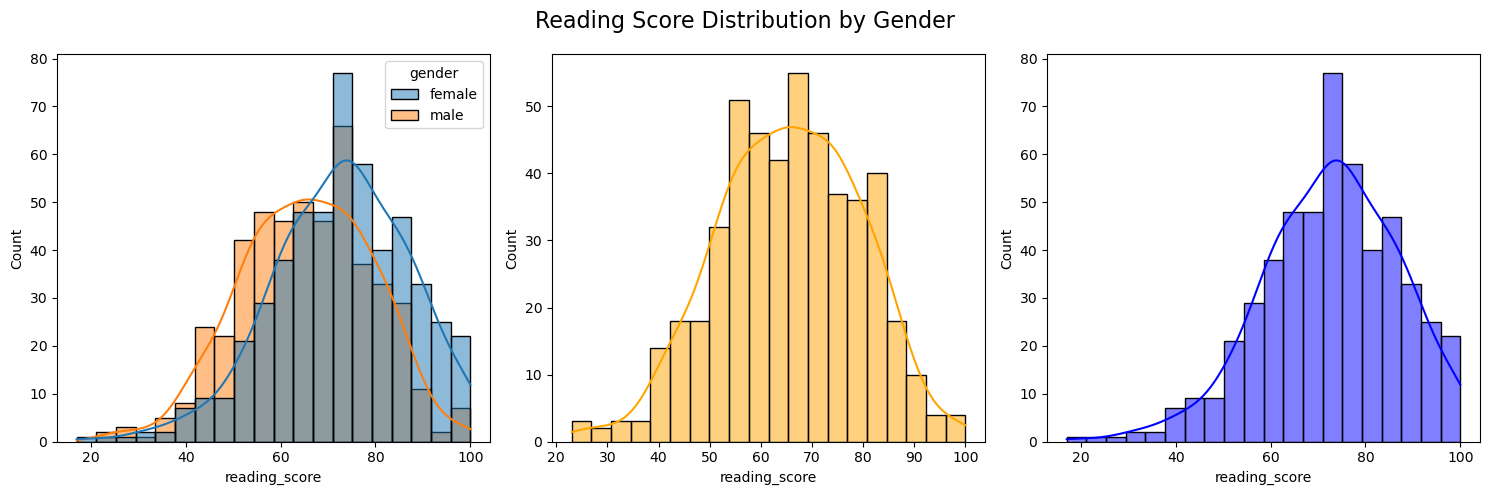

In [19]:
# Reading Score
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='reading_score', kde=True, hue='gender', bins=20)
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='reading_score', kde=True, color='orange', bins=20)
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='reading_score', kde=True, color='blue', bins=20)
plt.suptitle('Reading Score Distribution by Gender', fontsize=16)

plt.tight_layout()
plt.show()

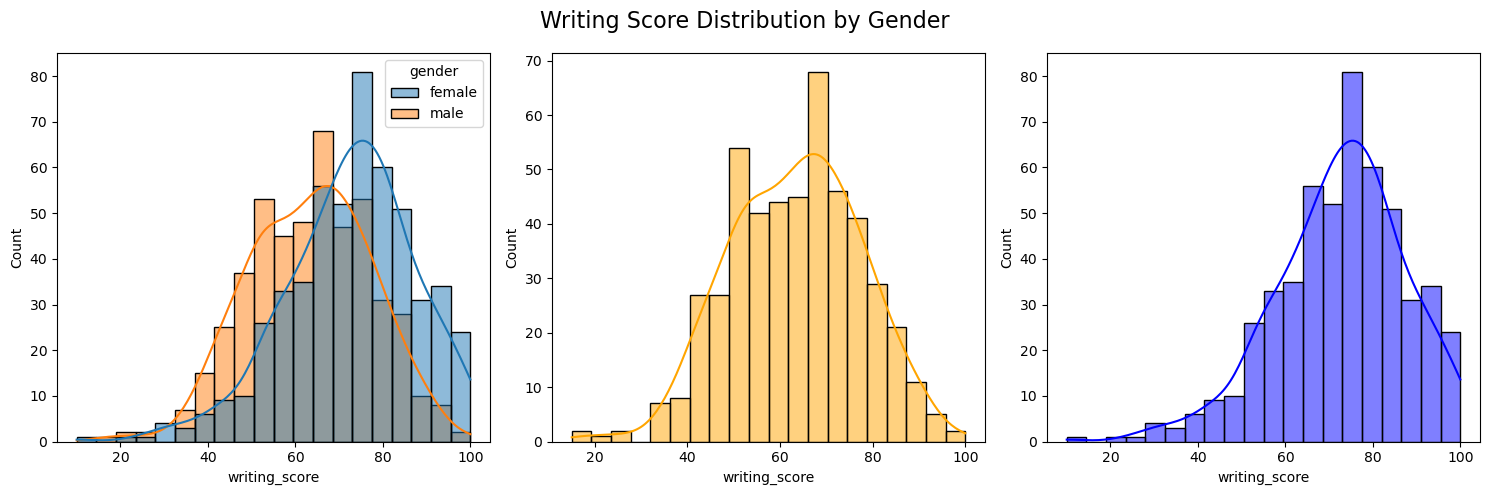

In [20]:
# Writing Score
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='writing_score', kde=True, hue='gender', bins=20)
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='writing_score', kde=True, color='orange', bins=20)
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='writing_score', kde=True, color='blue', bins=20)
plt.suptitle('Writing Score Distribution by Gender', fontsize=16)

plt.tight_layout()
plt.show()

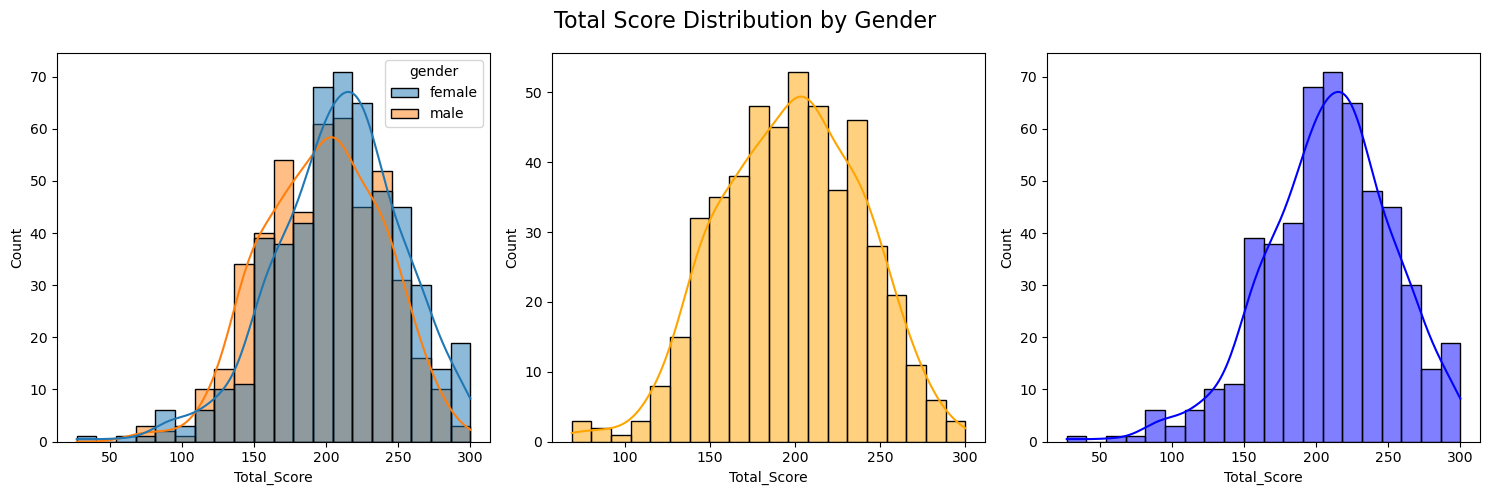

In [21]:
# Total Score
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Total_Score', kde=True, hue='gender', bins=20)
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='Total_Score', kde=True, color='orange', bins=20)
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='Total_Score', kde=True, color='blue', bins=20)
plt.suptitle('Total Score Distribution by Gender', fontsize=16)

plt.tight_layout()
plt.show()

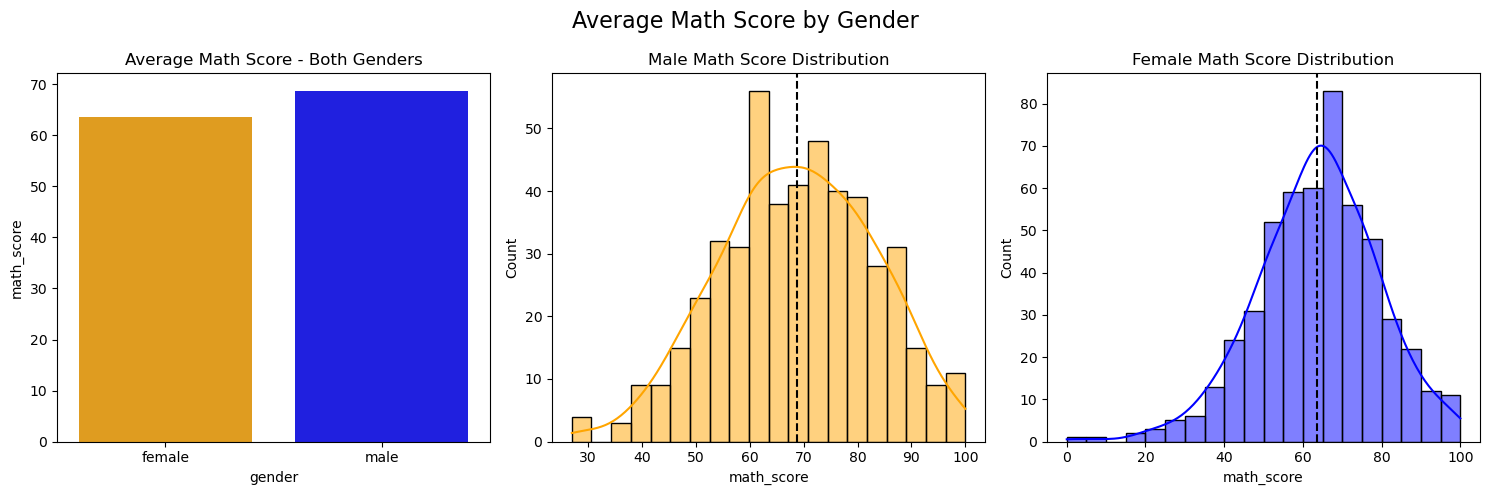

In [22]:
# Compute average math_score for each gender
avg_math_df = df.groupby('gender', as_index=False)['math_score'].mean()

# Plot
fig = plt.figure(figsize=(15,5))

# Panel 1: Both genders
plt.subplot(1, 3, 1)
sns.barplot(data=avg_math_df, x='gender', y='math_score', palette=['orange', 'blue'])
plt.title('Average Math Score - Both Genders')

# Panel 2: Male only
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='math_score', kde=True, color='orange', bins=20)
plt.axvline(avg_math_df[avg_math_df['gender'] == 'male']['math_score'].values[0], color='black', linestyle='--', linewidth=1.5)
plt.title('Male Math Score Distribution')

# Panel 3: Female only
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='math_score', kde=True, color='blue', bins=20)
plt.axvline(avg_math_df[avg_math_df['gender'] == 'female']['math_score'].values[0], color='black', linestyle='--', linewidth=1.5)
plt.title('Female Math Score Distribution')

# Main title
plt.suptitle('Average Math Score by Gender', fontsize=16)
plt.tight_layout()
plt.show()

#### Insight 
- Generally, we see that girls have on average a better exam scores than boys
- Boys do better particular in Math (Higher scores and higher mean score)

#### By other metrics

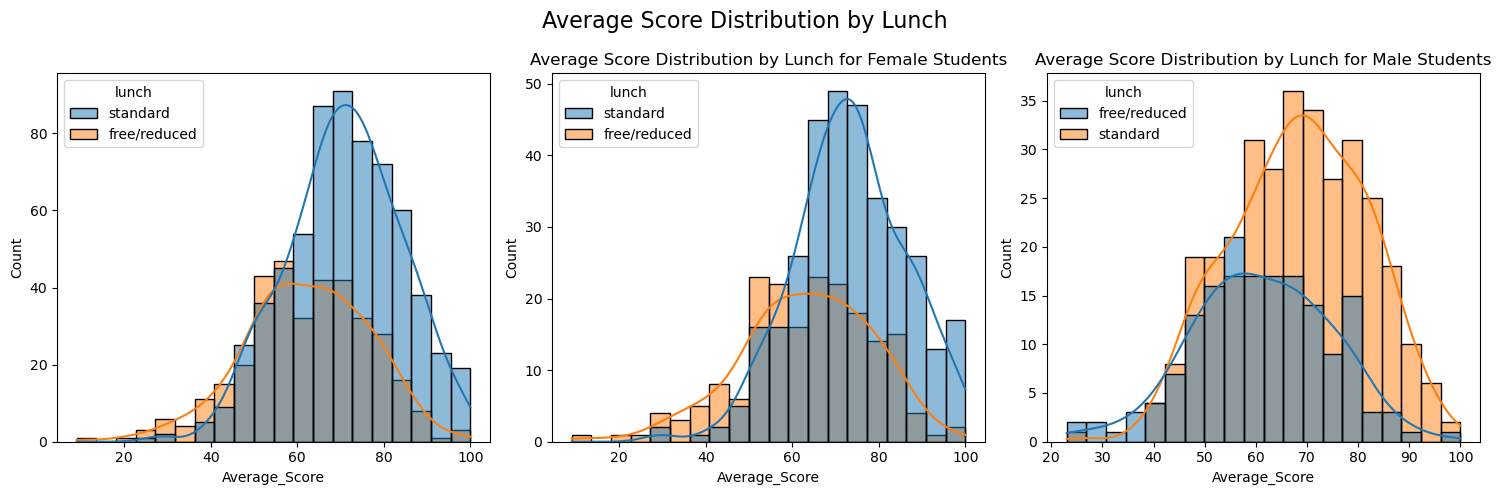

In [23]:
# Compare by lunch
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Average_Score', kde=True, hue='lunch', bins=20)
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'female'], x='Average_Score', kde=True, hue='lunch', bins=20)
plt.title('Average Score Distribution by Lunch for Female Students')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'male'], x='Average_Score', kde=True, hue='lunch', bins=20)
plt.title('Average Score Distribution by Lunch for Male Students')

plt.suptitle('Average Score Distribution by Lunch', fontsize=16)
plt.tight_layout()
plt.show()

#### Insights
- Students on average performs better with Standard Lunch regardless of gender

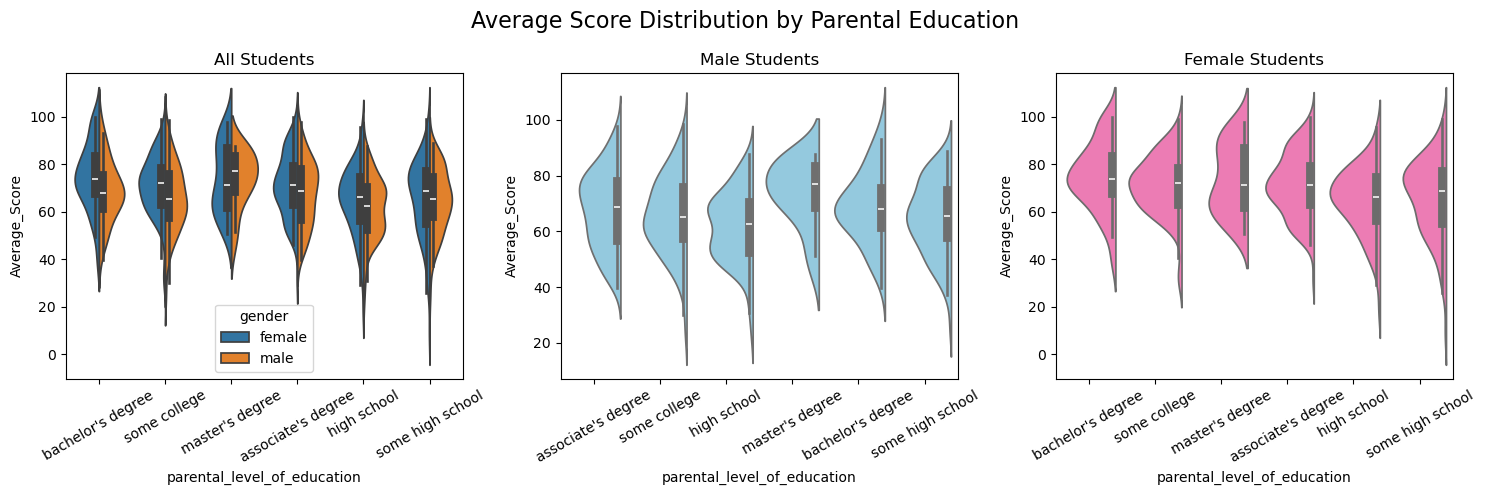

In [24]:
fig = plt.figure(figsize=(15,5))

# Panel 1: All students
plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='parental_level_of_education', y='Average_Score', hue='gender', split=True)
plt.title('All Students')
plt.xticks(rotation=30)

# Panel 2: Male students only
plt.subplot(1, 3, 2)
sns.violinplot(data=df[df['gender'] == 'male'], x='parental_level_of_education', y='Average_Score', split=True, color='#87CEEB')
plt.title('Male Students')
plt.xticks(rotation=30)

# Panel 3: Female students only
plt.subplot(1, 3, 3)
sns.violinplot(data=df[df['gender'] == 'female'], x='parental_level_of_education', y='Average_Score', split=True, color='#FF69B4')
plt.title('Female Students')
plt.xticks(rotation=30)

plt.suptitle('Average Score Distribution by Parental Education', fontsize=16)
plt.tight_layout()
plt.show()

#### Insights

- In general, parent's education doesn't help students perform well in exams.
- The second plot shows that parents whose education is at the associate's degree or master's degree level tend to have male children who perform well in exams.
- The third plot indicates there is no effect of parent's education on female students' performance.

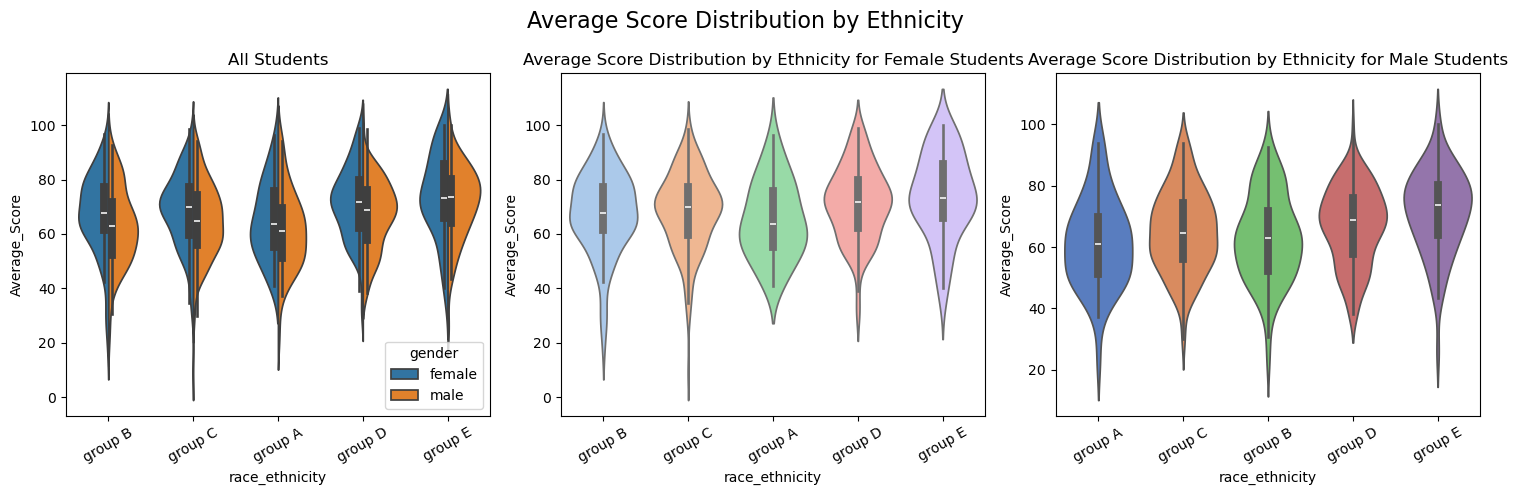

In [25]:
fig = plt.figure(figsize=(15,5))

# Panel 1: All students
plt.subplot(1, 3, 1)
sns.violinplot(
    data=df,
    x='race_ethnicity',
    y='Average_Score',
    hue='gender',
    split=True
)
plt.title('All Students')
plt.xticks(rotation=30)

# Panel 2: Female students
plt.subplot(1, 3, 2)
sns.violinplot(
    data=df[df['gender'] == 'female'],
    x='race_ethnicity',
    y='Average_Score',
    palette='pastel'
)
plt.title('Average Score Distribution by Ethnicity for Female Students')
plt.xticks(rotation=30)

# Panel 3: Male students
plt.subplot(1, 3, 3)
sns.violinplot(
    data=df[df['gender'] == 'male'],
    x='race_ethnicity',
    y='Average_Score',
    palette='muted'
)
plt.title('Average Score Distribution by Ethnicity for Male Students')
plt.xticks(rotation=30)

plt.suptitle('Average Score Distribution by Ethnicity', fontsize=16)
plt.tight_layout()
plt.show()

#### Insight
- On average, group A and group B do poorly on exams

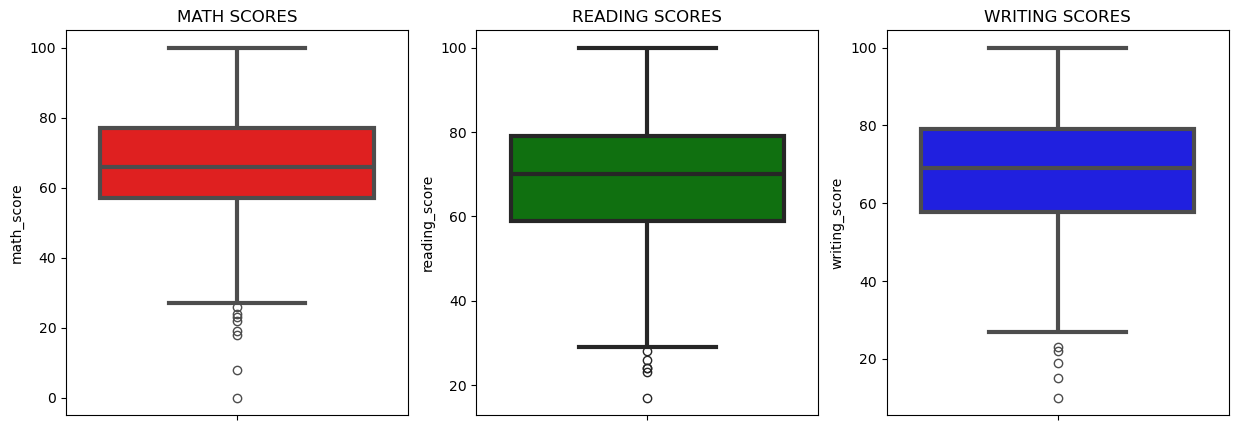

In [26]:
plt.figure(figsize=(15,5))

# Math score
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score', data=df, color='red', linewidth=3)

# Reading score
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score', data=df, color='green', linewidth=3)

# Writing score
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.show()

#### Insight
- From the graph above, we can clearly see that most students score in between 60-80 in Maths whereas in Writing and Reading most would score from 50-80
- There are some outliers for all subjects

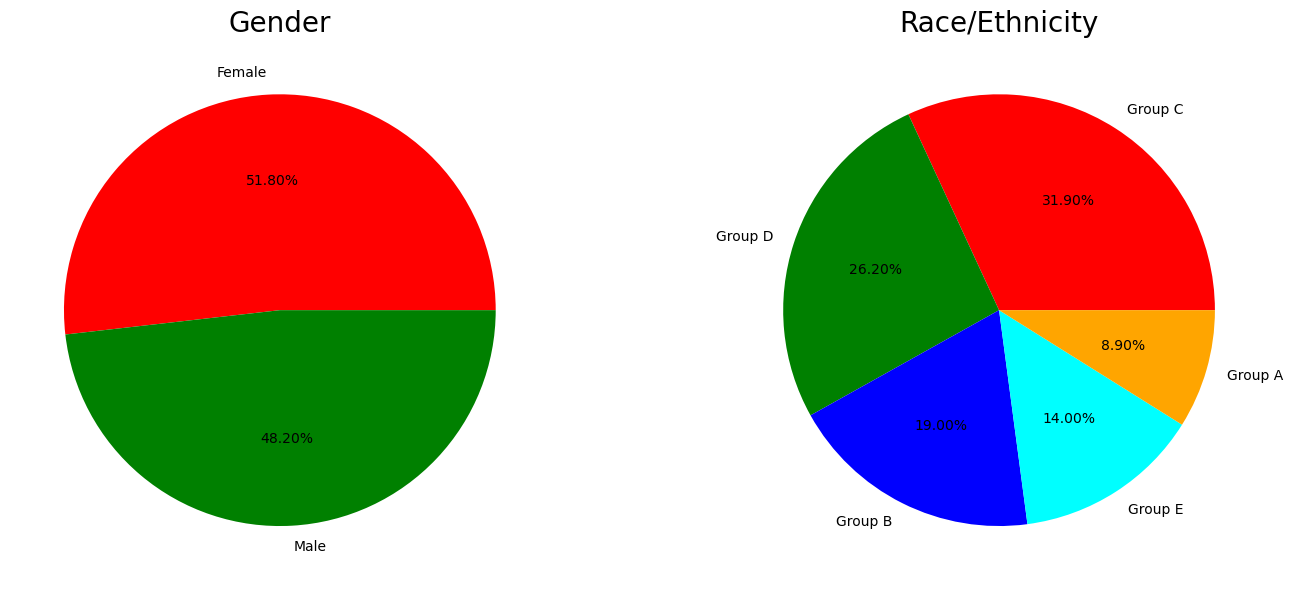

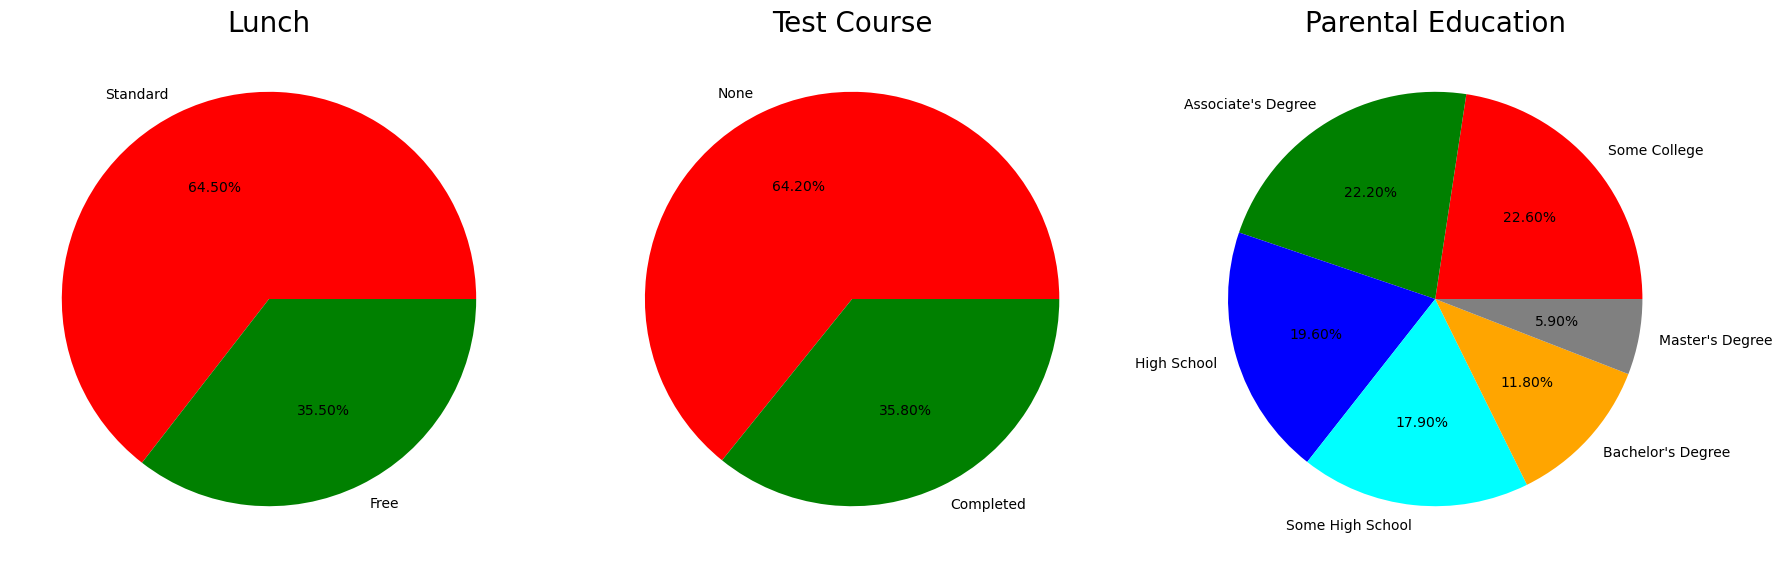

In [27]:
# Figure 1: Gender and Race/Ethnicity
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 2, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


# Figure 2: Lunch, Test Course, Parental Education
plt.rcParams['figure.figsize'] = (18, 6)

plt.subplot(1, 3, 1)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 2)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 3)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

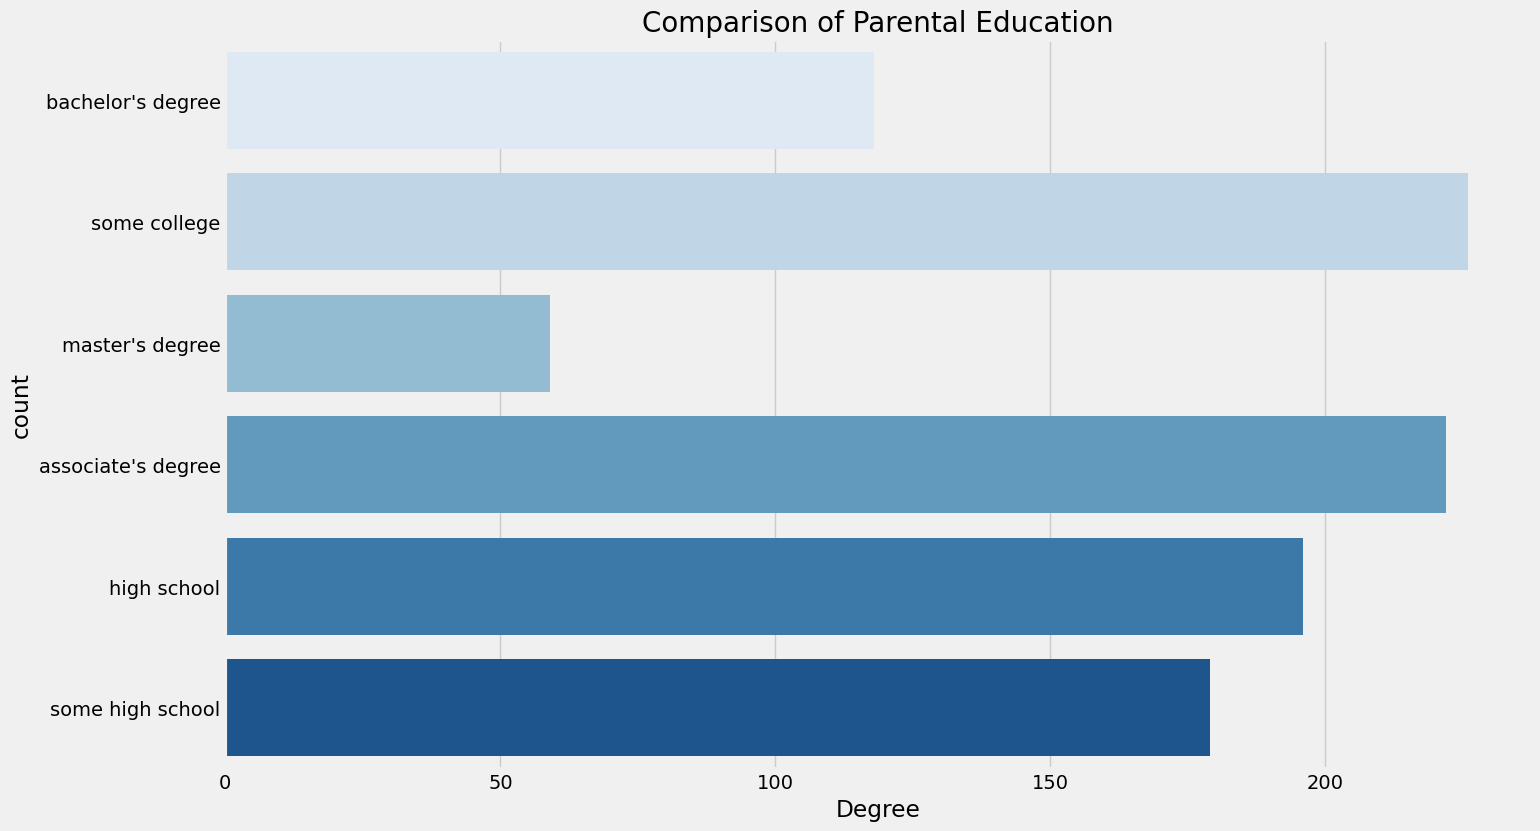

In [28]:
# Count of parental level of education by degree
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

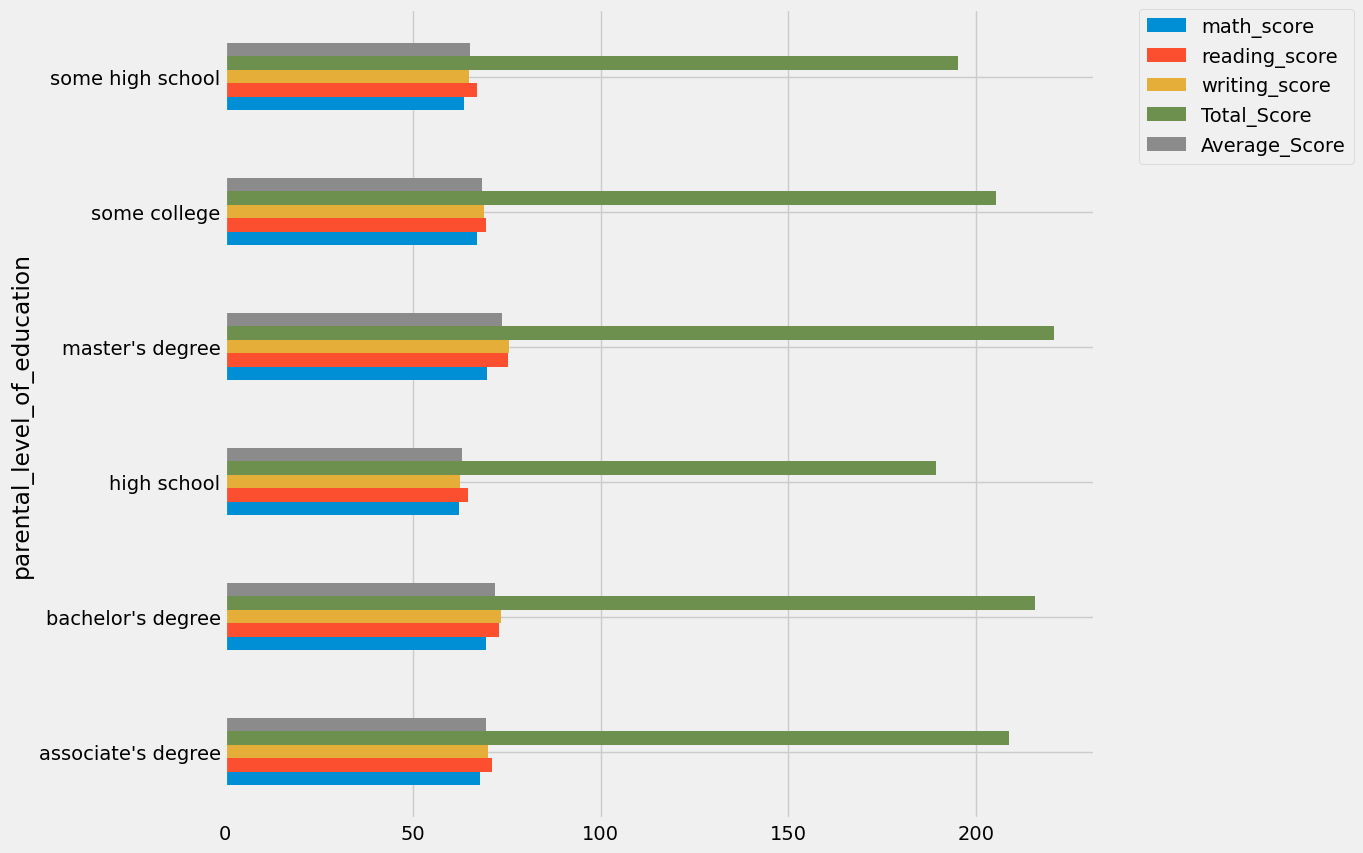

In [29]:
# Average scores by parental level of education
num_cols = df.select_dtypes(include='number').columns

(df.groupby('parental_level_of_education')[num_cols]
   .mean()
   .plot(kind='barh', figsize=(10,10)))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

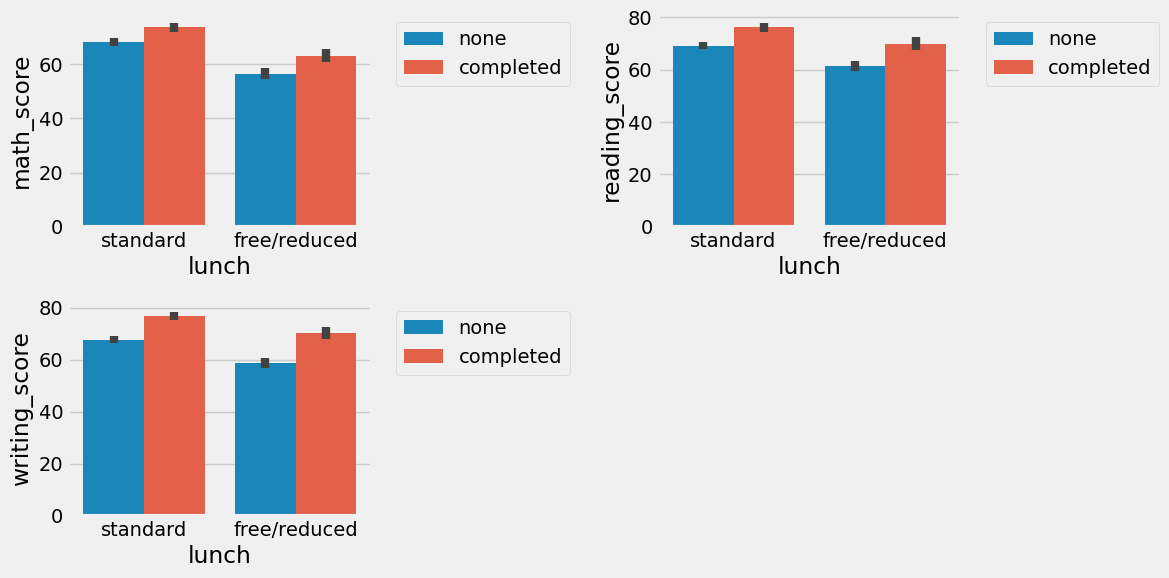

In [30]:
# Average scores by lunch and test preparation course
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2,2,2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2,2,3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Insight 
- We can clearly see that students whose parents have a higher level of education (masters/bachelors) tend to have higher exam scores
- Students who has completed the test preparation course has higher scores in all 3 subjects
- Students who had a standard lunch scored higher in every subject, regardless of whether they completed the test preparation course. 

## 4) Conclusion

- The dataset has a nearly equal number of male and female students, with Group C having the largest representation.  
- More students have a standard lunch and have not enrolled in any test preparation course.  
- The most common parental education level is "Some College," followed closely by "Associate’s Degree."  
- Students whose parents hold a bachelor’s or master’s degree tend to achieve higher exam scores, particularly among male students; parental education level appears to have little effect on female students’ scores.  
- Students who completed the test preparation course scored higher in all subjects.  
- Students with a standard lunch consistently scored higher across all subjects, regardless of test preparation course completion.  
- Girls generally have higher average exam scores than boys, except in Math, where boys perform better in both score distribution and mean score.  
- Most students score between 60–80 in Math and 50–80 in Writing and Reading, with some outliers present in all subjects.  